In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
lang_df = pd.read_csv("language-data.tsv", sep="\t")
lang_df = lang_df[~ lang_df["UD link"].isna()]
lang_df["big_family"] = lang_df["family"].str.split(",").str[0].str.strip()

In [4]:
lang_df

,language,wiki article count 2018,family,script,UD token count,UD link,UD comment,big_family
0,Afrikaans,68000.0,"IE, Germanic",Latin,49000.0,https://github.com/UniversalDependencies/UD_Af...,NaN,IE
1,Albanian,83000.0,"IE, Albanian",Latin,900.0,https://github.com/UniversalDependencies/UD_Al...,test only,IE
2,Arabic,653000.0,"Afro-Asiatic, Semitic",Arabic,282000.0,https://github.com/UniversalDependencies/UD_Ar...,NaN,Afro-Asiatic
4,Armenian,250000.0,"IE, Armenian",Armenian,52000.0,https://github.com/UniversalDependencies/UD_Ar...,NaN,IE
8,Basque,310000.0,Basque,Latin,121000.0,https://github.com/UniversalDependencies/UD_Ba...,NaN,Basque
...,...,...,...,...,...,...,...,...
93,Urdu,144000.0,"IE, Indic",Arabic,138000.0,https://github.com/UniversalDependencies/UD_Ur...,NaN,IE
95,Vietnamese,1200000.0,"Austro-Asiatic, Viet-Muong",Latin,58000.0,https://github.com/UniversalDependencies/UD_Vi...,NaN,Austro-Asiatic
98,Welsh,102000.0,"IE, Celtic",Latin,48000.0,https://github.com/UniversalDependencies/UD_We...,NaN,IE
101,Yoruba,32000.0,"Niger-Congo, Defoid",Latin,8000.0,https://github.com/UniversalDependencies/UD_Yo...,test only,Niger-Congo


[Text(0.5, 0, 'No. Wikipedia articles in 2018'),
 Text(0, 0.5, 'No. Tokens in Universal Dependencies Data')]

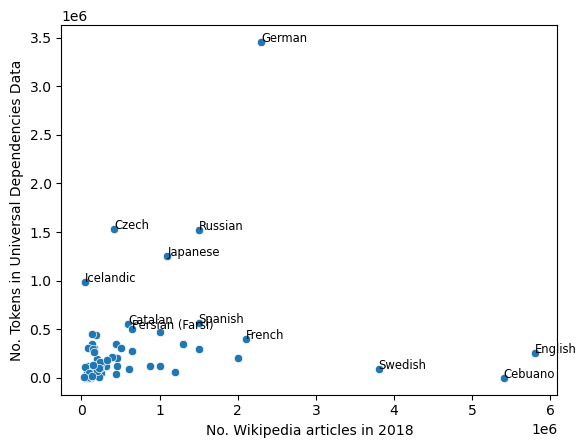

In [5]:
ax = sns.scatterplot(
    x="wiki article count 2018",
    y="UD token count",
    data=lang_df,
)
for idx, row in lang_df.iterrows():
    if row["wiki article count 2018"] > 2e6 or row["UD token count"] > 0.5e6:
        ax.text(
            row["wiki article count 2018"]+0.01, row["UD token count"],
            row['language'], horizontalalignment='left', 
     size='small', color='black'
        )

ax.set(xlabel='No. Wikipedia articles in 2018', ylabel='No. Tokens in Universal Dependencies Data')


[Text(0.5, 0, 'Language Family'), Text(0, 0.5, 'Count')]

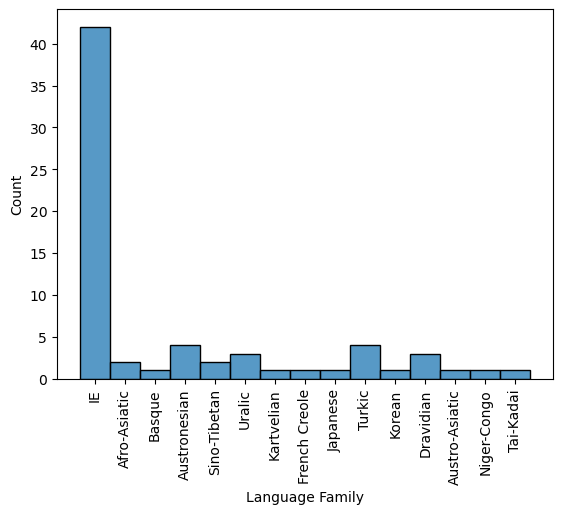

In [6]:
plt.xticks(rotation=90)
ax = sns.histplot(x="big_family", data=lang_df, )
ax.set(xlabel='Language Family', ylabel='Count')

[Text(0.5, 0, 'Script'), Text(0, 0.5, 'Count')]

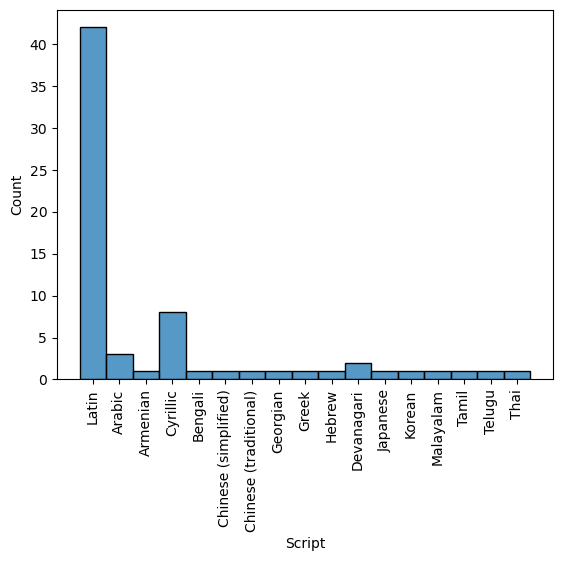

In [7]:
plt.xticks(rotation=90)
ax = sns.histplot(x="script", data=lang_df)
ax.set(xlabel='Script', ylabel='Count')

In [8]:
from utils.read_conllu import Data

In [9]:
data= "data"
langs = os.listdir(data)
df_data = list()
for lang in langs:
    lang_path = os.path.join(data, lang)
    lang_data = Data(lang_path)
    for split in lang_data.splits:
        if "train" in split:
            pos_stats, _, _ = lang_data.feature_coverage(split)
            pos_stats["language"] = lang
            df_data.append(pos_stats)

df = pd.DataFrame(df_data)



In [10]:
group_lang = df.groupby(by="language").mean()
group_lang = group_lang.fillna(0)

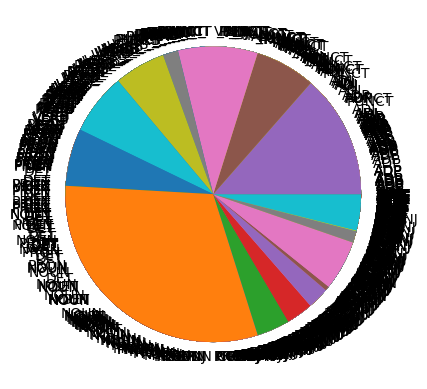

In [11]:
for i, lang in enumerate(group_lang.index):
    plt.pie(group_lang.loc[lang, :].values.tolist(), labels=group_lang.columns)